In [1]:
! pip install --upgrade matplotlib
! pip install wordcloud

In [2]:
import numpy as np 
import pandas as pd
import nltk
nltk.download('wordnet')
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
import copy 
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split as split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df = pd.read_csv('Womens.csv',index_col=0)
df

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

In [4]:
df.shape

(23486, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
df= df.dropna()

In [8]:
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

In [9]:
df.rename(columns={
    
    'Clothing ID' : 'Clothing_ID',
    'Review Text' : 'Review_Text',
    'Recommended IND' : 'Recommended',
    'Positive Feedback Count' : 'Positive_Feedback_Count',
    'Division Name' : 'Division_Name',
    'Department Name' : 'Department_Name',
    'Class Name' : 'Class_Name',    
},inplace=True)

In [10]:
data = df[['Review_Text','Recommended']]

In [11]:
#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
#expanding the dispay of text sms column

data.head()

Review_Text  \
2  I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c   
3  I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!                                                                                                                                                                                                                                                                                                                                                                                           
4  This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!                                                                                                                                                                                                                                                                                                                       
5  I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.               
6  I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly. it is a little baggy on me and hte xs is hte msallet size (bummer, no petite). i decided to jkeep it though, because as i said, it matvehd everything. my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.       

   Recommended  
2  0            
3  1            
4  1            
5  0            
6  1

**Top Frequent 200 Words in the Dataset (Before Cleaning)**

In [12]:
FreqOfWords = data['Review_Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [13]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    # stem_words=[stemmer.stem(w) for w in filtered_words]
    # lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


data['Review_Text']=data['Review_Text'].map(lambda s:preprocess(s))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word,'v') for word in text.split()])
data['Review_Text'] = data['Review_Text'].apply(lambda text: lemmatize_words(text))
data

Review_Text  \
2      high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3      love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                          
4      shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                      
5      love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                       
6      aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops       
...                                                                                                                                                                                                                                                                                            ...       
23481  happy snag dress great price easy slip flatter cut color combo                                                                                                                                                                                                                                    
23482  remind maternity clothe soft stretchy shiny material cut flatter drape nicely find one button close front look awkward nice long sleeves maybe others                                                                                                                                             
23483  fit well top see never would work glad able try store order online different fabric would great                                                                                                                                                                                                   
23484  buy dress wed summer cute unfortunately fit perfect medium fit waist perfectly way long big bust shoulder want spend money could get tailor felt like might worth side note dress deliver nordstrom tag find much cheaper look                                                                    
23485  dress lovely platinum feminine fit perfectly easy wear comfy highly recommend                                                                                                                                                                                                                     

       Recommended  
2      0            
3      1            
4      1            
5      0            
6      1            
...   ..            
23481  1            
23482  1            
23483  0            
23484  1            
23485  1            

[19662 rows x 2 columns]

In [15]:
data_LSA = copy.deepcopy(data[['Review_Text']])
data_LDA = copy.deepcopy(data[['Review_Text']])
data_NMF = copy.deepcopy(data[['Review_Text']])

**Top Frequent 200 Words in the Dataset (After Cleaning)**

In [16]:
FreqOfWords = data['Review_Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [17]:
data['Review_length'] = data['Review_Text'].apply(len)
print(data.shape)
data.head()

(19662, 3)


Review_Text  \
2  high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                          
4  shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                      
5  love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                       
6  aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops       

   Recommended  Review_length  
2  0            287            
3  1            88             
4  1            108            
5  0            251            
6  1            283

<AxesSubplot:xlabel='Review_length', ylabel='Density'>

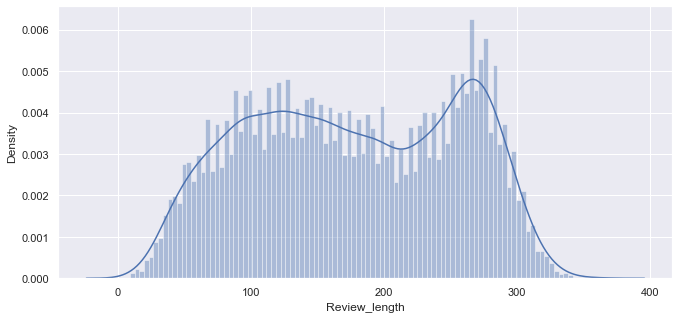

In [18]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(data['Review_length'] ,hist=True, bins=100)

In [19]:
df_zero = data[data['Recommended']==0]
df_one = data[data['Recommended']==1]

<AxesSubplot:ylabel='Density'>

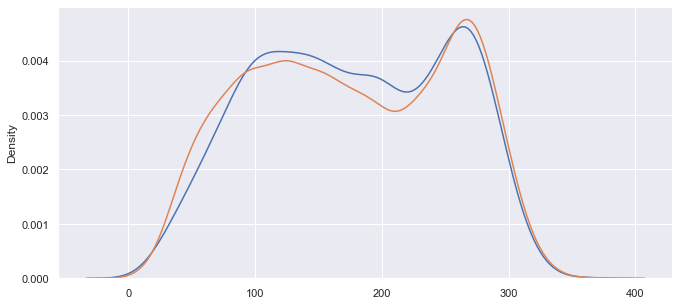

In [20]:
sns.distplot(df_zero[['Review_length']] ,hist=False)
sns.distplot(df_one[['Review_length']], hist=False)

In [21]:
data['Polarity'] = data['Review_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head(5)

Review_Text  \
2  high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper   
3  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                          
4  shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                      
5  love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress                                       
6  aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops       

   Recommended  Review_length  Polarity  
2  0            287            0.062409  
3  1            88             0.500000  
4  1            108            0.458333  
5  0            251            0.106250  
6  1            283            0.075625

<AxesSubplot:ylabel='Frequency'>

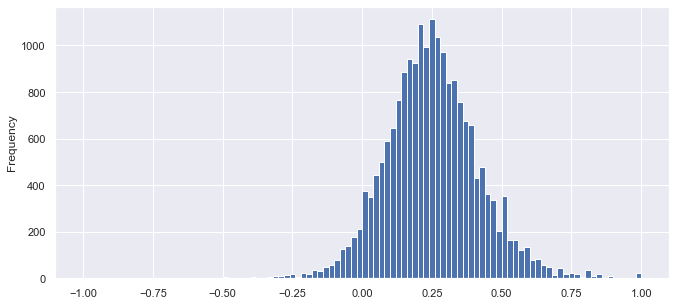

In [22]:
data['Polarity'].plot(kind='hist', bins=100)

In [23]:
pos_df = data[data.Recommended== 1]
neg_df = data[data.Recommended== 0]
pos_df.head(3)

Review_Text  \
3  love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment                                                                                                                                                                                                      
4  shirt flatter due adjustable front tie perfect length wear leggings sleeveless pair well cardigan love shirt                                                                                                                                                                                  
6  aded basket hte last mintue see would look like person store pick go teh darkler color pale hte color really gorgeous turn mathced everythiing try prefectly little baggy hte hte msallet size bummer petite decide jkeep though say matvehd everything ejans pant skirt waas try keep oops   

   Recommended  Review_length  Polarity  
3  1            88             0.500000  
4  1            108            0.458333  
6  1            283            0.075625

In [24]:
pos_words =[]
neg_words = []

for review in pos_df.Review_Text:
    pos_words.append(review) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df.Review_Text:
    neg_words.append(review)
neg_words = ' '.join(neg_words)
neg_words[:400]

'high hop dress really want work initially order petite small usual size find outrageously small small fact could zip reorder petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full ov'

**Positive reviews**

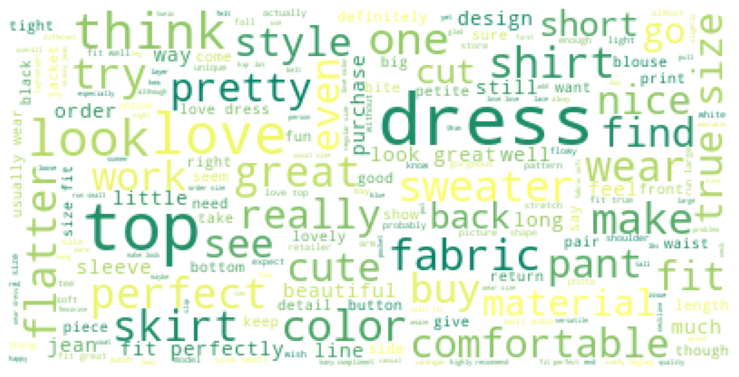

In [25]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Negative Reviews**

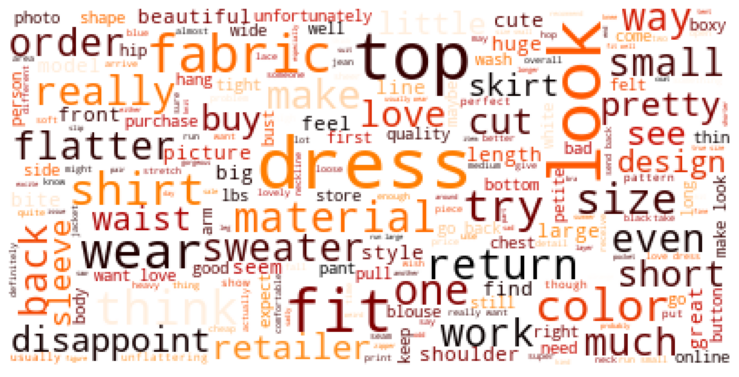

In [26]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
def text_vectorizing_process(sentence_string):
    return [word for word in sentence_string.split()]

In [28]:
bow_transformer = CountVectorizer(text_vectorizing_process)

In [29]:
bow_transformer.fit(data['Review_Text'])

CountVectorizer(input=<function text_vectorizing_process at 0x0000021C9AA731F0>)

In [30]:
print(data['Review_Text'].iloc[3])

love tracy reese dress one petite feet tall usually wear brand dress pretty package lot dress skirt long full overwhelm small frame stranger alterations shorten narrow skirt would take away embellishment garment love color idea style work return dress


In [31]:
example = bow_transformer.transform([data['Review_Text'].iloc[3]])
print(example)
#3507=Love
#4438=petit

  (0, 274)	1
  (0, 614)	1
  (0, 1073)	1
  (0, 1695)	1
  (0, 2641)	4
  (0, 2820)	1
  (0, 3193)	1
  (0, 3472)	1
  (0, 3533)	1
  (0, 3595)	1
  (0, 4238)	1
  (0, 5032)	1
  (0, 5076)	1
  (0, 5090)	2
  (0, 5688)	1
  (0, 5985)	1
  (0, 6162)	1
  (0, 6178)	1
  (0, 6402)	1
  (0, 6740)	1
  (0, 7093)	1
  (0, 7288)	1
  (0, 7817)	1
  (0, 7965)	2
  (0, 8051)	1
  (0, 8398)	1
  (0, 8476)	1
  (0, 8716)	1
  (0, 8722)	1
  (0, 9085)	1
  (0, 9492)	1
  (0, 9723)	1
  (0, 9930)	1
  (0, 9959)	1


In [32]:
Reviews = bow_transformer.transform(data['Review_Text'])
Reviews

<19662x10086 sparse matrix of type '<class 'numpy.int64'>'
	with 505670 stored elements in Compressed Sparse Row format>

In [33]:
print('Shape of Sparse Matrix', Reviews.shape)
print('Amount of Non-Zero occurences:', Reviews.nnz)

Shape of Sparse Matrix (19662, 10086)
Amount of Non-Zero occurences: 505670


In [34]:
tfidf_transformer = TfidfTransformer().fit(Reviews)

tfidf_example = tfidf_transformer.transform(example)
print (tfidf_example)
#3507=Love
#4438=petit

  (0, 9959)	0.08293641129712655
  (0, 9930)	0.0990601434531033
  (0, 9723)	0.0641043957181006
  (0, 9492)	0.10852048825755022
  (0, 9085)	0.23912531330686654
  (0, 8722)	0.14646141229828033
  (0, 8716)	0.12449011538883345
  (0, 8476)	0.11022687477091744
  (0, 8398)	0.2878869347283323
  (0, 8051)	0.08815124919287881
  (0, 7965)	0.23031563179248474
  (0, 7817)	0.21500034701452997
  (0, 7288)	0.113236140836483
  (0, 7093)	0.23912531330686654
  (0, 6740)	0.10704046529437382
  (0, 6402)	0.10852048825755022
  (0, 6178)	0.19359131443585795
  (0, 6162)	0.1927966055114305
  (0, 5985)	0.09327310102709127
  (0, 5688)	0.18557659004349084
  (0, 5090)	0.1254773963216315
  (0, 5076)	0.12733522467413227
  (0, 5032)	0.10412978265183051
  (0, 4238)	0.18297888609012944
  (0, 3595)	0.19728613296116498
  (0, 3533)	0.14521525494139215
  (0, 3472)	0.15447716254396365
  (0, 3193)	0.20181588181764384
  (0, 2820)	0.26106636249031484
  (0, 2641)	0.27663464634592344
  (0, 1695)	0.07222410182303753
  (0, 1073)	0.1

In [35]:
[i for i in bow_transformer.vocabulary_.items() if i[1]==3507]

[('fringy', 3507)]

In [36]:
[i for i in bow_transformer.vocabulary_.items()][6:60:10]

[('initially', 4394),
 ('zip', 10075),
 ('tight', 8969),
 ('sew', 7706),
 ('wear', 9723),
 ('tie', 8962)]

In [37]:
messages_tfidf = tfidf_transformer.transform(Reviews)
messages_tfidf.shape

(19662, 10086)

In [38]:
print(messages_tfidf[:1]) 
#tuple(index_num, word_num), tfidf_proba

  (0, 10078)	0.13192902307777518
  (0, 10075)	0.14362416968520703
  (0, 9930)	0.08006841998809525
  (0, 9673)	0.08745081123952772
  (0, 9490)	0.10815510857221793
  (0, 9042)	0.060198557943328006
  (0, 8969)	0.09692097478483604
  (0, 8149)	0.14759007219274572
  (0, 8051)	0.21375290798540278
  (0, 7935)	0.05300977826936628
  (0, 7706)	0.14323354348255093
  (0, 7702)	0.13482859634139402
  (0, 7195)	0.18057882329736286
  (0, 7018)	0.07351952569615902
  (0, 6402)	0.17543007163586907
  (0, 6117)	0.11041714882646873
  (0, 6103)	0.25042803568780936
  (0, 6045)	0.06777641637802657
  (0, 5790)	0.11110721885488456
  (0, 5764)	0.40916987846275493
  (0, 5341)	0.08819161340198291
  (0, 5191)	0.189863948805274
  (0, 4833)	0.337637511027222
  (0, 4394)	0.16674200928775787
  (0, 4277)	0.18831283637456203
  (0, 4112)	0.12133442154691983
  (0, 4028)	0.10226283029278478
  (0, 3877)	0.2913442078522397
  (0, 3321)	0.15541436595390137
  (0, 3275)	0.0482577221568561
  (0, 3249)	0.08889263038449907
  (0, 3096)

In [39]:
messages_tfidf = messages_tfidf.toarray()
messages_tfidf = pd.DataFrame(messages_tfidf)
print(messages_tfidf.shape)
messages_tfidf.head()

(19662, 10086)


0    1    2    3    4    5    6    7    8    9  ...  10076  10077  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0     
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0     
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0     
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0     
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0    0.0     

      10078  10079  10080  10081  10082  10083  10084  10085  
0  0.131929  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
1  0.000000  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
2  0.000000  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  0.000000  0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  0.000000  0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10086 columns]

In [40]:
df_all = pd.merge(data.drop(columns='Review_Text'),messages_tfidf, 
                  left_index=True, right_index=True )
df_all.head()

Recommended  Review_length  Polarity    0    1    2    3    4    5    6  \
2  0            287            0.062409  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1            88             0.500000  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1            108            0.458333  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0            251            0.106250  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  1            283            0.075625  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  10076  10077  10078  10079  10080  10081  10082  10083  10084  10085  
2  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
5  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
6  ...  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10089 columns]

In [41]:
X = df_all.drop('Recommended', axis=1)
y = df_all.Recommended

X.head()

Review_length  Polarity    0    1    2    3    4    5    6    7  ...  \
2  287            0.062409  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  88             0.500000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  108            0.458333  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
5  251            0.106250  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
6  283            0.075625  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   10076  10077  10078  10079  10080  10081  10082  10083  10084  10085  
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
5  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    
6  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    

[5 rows x 10088 columns]

In [42]:
X_train, X_test, y_train, y_test = split(X,y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13169, 10088), (3293, 10088), (13169,), (3293,))

In [43]:
y_train.value_counts(normalize=True)

1    0.818589
0    0.181411
Name: Recommended, dtype: float64

In [44]:
y_test.value_counts(normalize=True)

1    0.818706
0    0.181294
Name: Recommended, dtype: float64

In [45]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
pd.DataFrame(X_train_scaled,columns= X_train.columns).describe()

Review_length      Polarity             0             1             2  \
count  13169.000000   13169.000000  13169.000000  13169.000000  13169.000000   
mean   0.473047       0.625357      0.000076      0.000214      0.000076       
std    0.221834       0.083879      0.008714      0.012638      0.008714       
min    0.000000       0.000000      0.000000      0.000000      0.000000       
25%    0.288136       0.572743      0.000000      0.000000      0.000000       
50%    0.468927       0.622917      0.000000      0.000000      0.000000       
75%    0.677966       0.675000      0.000000      0.000000      0.000000       
max    1.000000       1.000000      1.000000      1.000000      1.000000       

                  3             4             5             6             7  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean   0.000209      0.000286      0.000368      0.000239      0.000317       
std    0.012415      0.013878      0.018907      0.012807      0.015120       
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000      1.000000       

       ...         10076         10077         10078         10079  \
count  ...  13169.000000  13169.000000  13169.000000  13169.000000   
mean   ...  0.000076      0.000076      0.004910      0.000076       
std    ...  0.008714      0.008714      0.042681      0.008714       
min    ...  0.000000      0.000000      0.000000      0.000000       
25%    ...  0.000000      0.000000      0.000000      0.000000       
50%    ...  0.000000      0.000000      0.000000      0.000000       
75%    ...  0.000000      0.000000      0.000000      0.000000       
max    ...  1.000000      1.000000      1.000000      1.000000       

              10080         10081         10082         10083         10084  \
count  13169.000000  13169.000000  13169.000000  13169.000000  13169.000000   
mean   0.000076      0.000149      0.000076      0.000297      0.000076       
std    0.008714      0.012057      0.008714      0.015442      0.008714       
min    0.000000      0.000000      0.000000      0.000000      0.000000       
25%    0.000000      0.000000      0.000000      0.000000      0.000000       
50%    0.000000      0.000000      0.000000      0.000000      0.000000       
75%    0.000000      0.000000      0.000000      0.000000      0.000000       
max    1.000000      1.000000      1.000000      1.000000      1.000000       

              10085  
count  13169.000000  
mean   0.000076      
std    0.008714      
min    0.000000      
25%    0.000000      
50%    0.000000      
75%    0.000000      
max    1.000000      

[8 rows x 10088 columns]

**Data Visualization (PCA)**

In [47]:
pca_transformer = PCA(n_components=2).fit(X_train_scaled)
X_train_scaled_pca = pca_transformer.transform(X_train_scaled)
X_test_scaled_pca = pca_transformer.transform(X_test_scaled)
X_train_scaled_pca[:1]

array([[-0.05622908, -0.0188053 ]])

<AxesSubplot:>

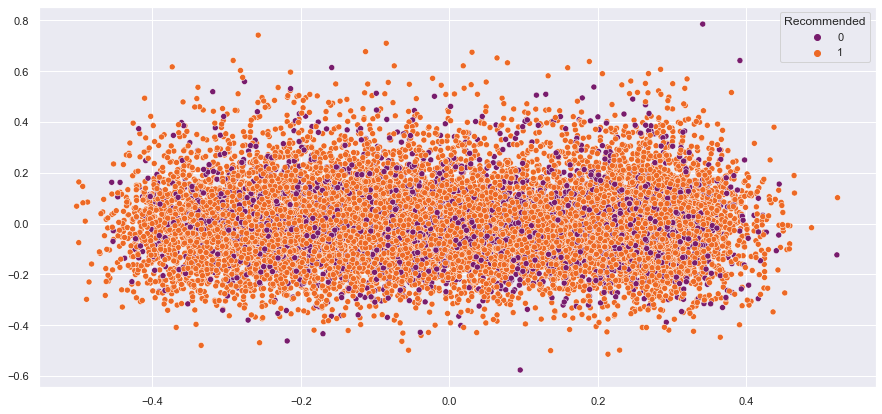

In [48]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=X_train_scaled_pca[:, 0], 
                y=X_train_scaled_pca[:, 1], 
                hue=y_train, 
                sizes=100,
                palette="inferno") 